In [28]:
# Step 1: Data Cleaning and Preparation

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:
# Load the data
file_path = r'C:\Users\Mohammad\OneDrive\Desktop\Unemployment in Indiaaa.xlsx'
unemployment_data = pd.read_excel(file_path)

In [30]:
# Inspect the data
print(unemployment_data.shape)
print(unemployment_data.info())
print(unemployment_data.head())
print(unemployment_data.tail())

(754, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB
None
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019  

In [31]:
# Drop duplicates
unemployment_data = unemployment_data.drop_duplicates()

In [38]:
# Missing values
print(unemployment_data.isnull().sum())

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64


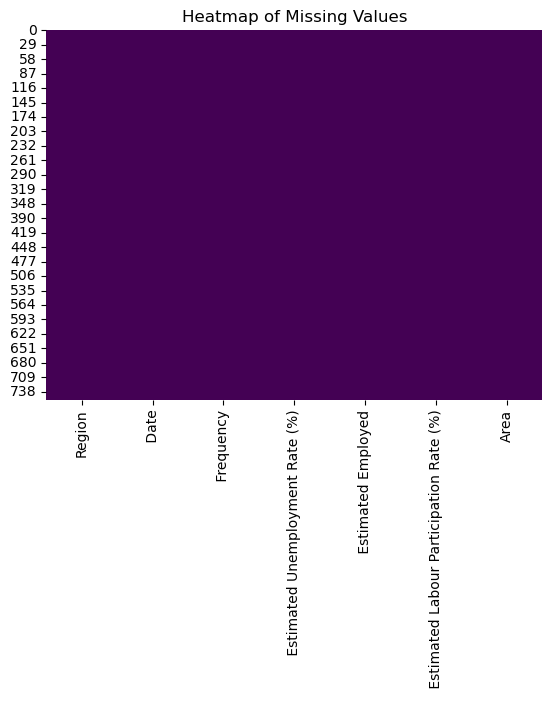

In [33]:
# Visualize missing values
sns.heatmap(unemployment_data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()


In [34]:
# Drop rows with missing values
unemployment_data = unemployment_data.dropna()

In [35]:
# Check the cleaned data
print(unemployment_data.shape)
print(unemployment_data.isnull().sum())

(740, 7)
Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64


C:\Users\Mohammad\anaconda3\vvv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mohammad\anaconda3\vvv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mohammad\anaconda3\vvv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


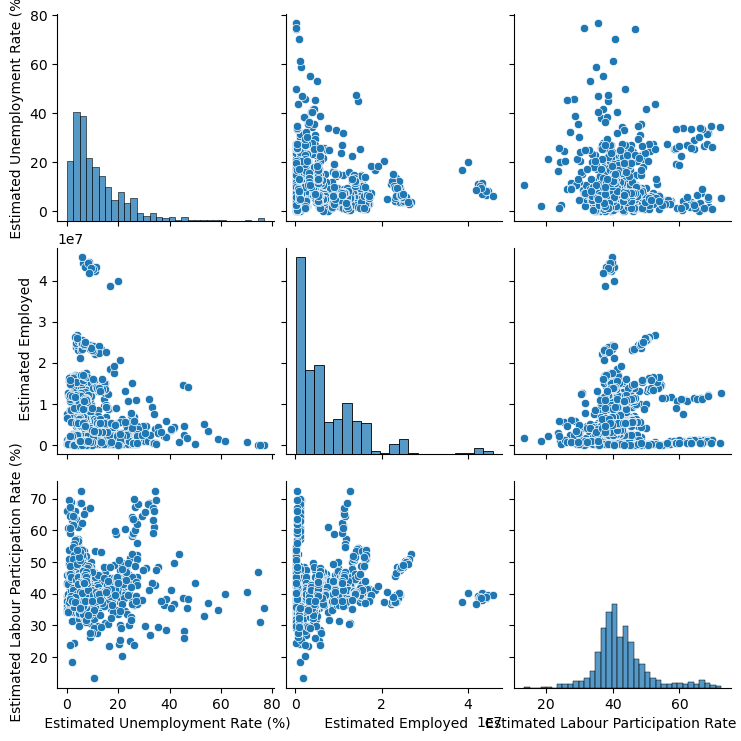

In [36]:
# Pairplot to visualize relationships
sns.pairplot(unemployment_data)
plt.show()

In [42]:
print(unemployment_data.columns)

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [44]:
X = unemployment_data.drop(columns=[' Estimated Unemployment Rate (%)'])
y = unemployment_data[' Estimated Unemployment Rate (%)']

In [45]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [46]:
# Preprocessing pipeline
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [47]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index([' Estimated Employed', ' Estimated Labour Participation Rate (%)'], dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Region', ' Date', ' Frequency', 'Area'], dtype='object'))])),
                ('regressor', LinearRegression())])

In [50]:

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [51]:
# Evaluation
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
print(f"Training MSE: {mse_train}, MAE: {mae_train}")
print(f"Testing MSE: {mse_test}, MAE: {mae_test}")

Training MSE: 41.95980385628384, MAE: 4.045757160650186
Testing MSE: 59.17853521294476, MAE: 4.506398455352881


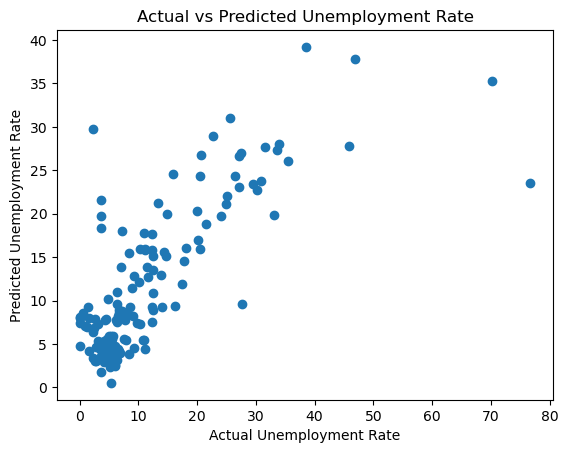

In [52]:
# Scatter plot of predictions
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Unemployment Rate')
plt.ylabel('Predicted Unemployment Rate')
plt.title('Actual vs Predicted Unemployment Rate')
plt.show()